In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cars_prices=pd.read_csv("..\data\cars_train.csv")

In [17]:
cars_prices.columns

Index(['Id', 'city', 'year', 'manufacturer', 'make', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'lat', 'long', 'county_fips', 'county_name',
       'state_fips', 'state_code', 'state_name', 'weather', 'price'],
      dtype='object')

In [19]:
cars_prices[cars_prices['price']<1000][['condition','price','title_status']]

,condition,price,title_status
12,fair,500,clean
16,NaN,500,clean
23,excellent,211,clean
27,good,950,clean
32,fair,500,missing
47,NaN,1,clean
81,good,950,clean
84,new,40,clean
94,good,1,clean
103,NaN,500,clean


In [21]:
def predict_condition(cars_prices):
    from sklearn import preprocessing
    df_odo = cars_prices.dropna()

    le = preprocessing.LabelEncoder()
    le.fit(df_odo.condition.unique())
    df_odo.condition = le.transform(df_odo.condition)

    # Entrenamos el modelo

    X = df_odo[['year', 'odometer']]
    y = df_odo['condition']

    from sklearn.model_selection import train_test_split

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=1)
    from sklearn.linear_model import LinearRegression
    reg_condition = LinearRegression(normalize=True).fit(X_train, Y_train)

    # Labelizamos

    from sklearn import preprocessing
    cars_prices.condition.fillna('desconocido', inplace=True)
    le = preprocessing.LabelEncoder()
    le.fit(cars_prices.condition.unique())
    cars_prices.condition = le.transform(cars_prices.condition)

    # Aplicamos modelo
    condition = pd.Series(reg_condition.predict(X_train))
    cars_prices['condition'].fillna(condition,inplace=True)

    return cars_prices

In [22]:
predict_condition(cars_prices)

c:\program files (x86)\python37-32\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Id,city,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,974298,duluth,2006.0,ford,f-250 super duty,3,8 cylinders,gas,154400.0,clean,...,pickup,white,47.746524,-90.357742,27031.0,Cook,27.0,MN,Minnesota,43.0
1,1051884,kansascity,1987.0,chevrolet,NaN,0,NaN,gas,NaN,clean,...,NaN,NaN,38.373182,-93.776859,29083.0,Henry/Rives,29.0,MO,Missouri,52.0
2,684464,palmsprings,2010.0,jeep,liberty sport,0,6 cylinders,gas,127722.0,clean,...,SUV,NaN,33.741059,-116.356434,6065.0,Riverside,6.0,CA,California,59.0
3,1255387,sanmarcos,2003.0,chevrolet,tahoe,2,8 cylinders,gas,NaN,clean,...,SUV,white,30.026266,-98.133363,48209.0,Hays,48.0,TX,Texas,67.0
4,1195520,tampa,2006.0,lexus,gs 300,0,NaN,gas,NaN,clean,...,NaN,NaN,27.868800,-82.734400,12103.0,Pinellas,12.0,FL,Florida,65.0
5,915095,battlecreek,2014.0,hyundai,elantra limited,3,NaN,gas,NaN,clean,...,NaN,grey,41.808900,-85.426400,26149.0,St. Joseph,26.0,MI,Michigan,45.0
6,1473203,bellingham,1927.0,ford,model t,2,NaN,gas,NaN,missing,...,convertible,brown,48.977172,-122.730559,53073.0,Whatcom,53.0,WA,Washington,50.0
7,771920,worcester,2010.0,NaN,hyundia accent,3,4 cylinders,gas,140000.0,clean,...,hatchback,blue,42.219300,-72.048100,25027.0,Worcester,25.0,MA,Massachusetts,50.0
8,507587,oklahomacity,2016.0,cadillac,cts,0,NaN,gas,28224.0,clean,...,sedan,NaN,35.559496,-97.645486,40109.0,Oklahoma,40.0,OK,Oklahoma,57.0
9,972509,rmn,2010.0,ford,f-150,4,8 cylinders,gas,121871.0,clean,...,pickup,red,44.049600,-92.489600,27109.0,Olmsted,27.0,MN,Minnesota,43.0


In [13]:
cars_prices=pd.read_csv("..\data\cars_train.csv")

In [57]:
cars_prices[cars_prices.cylinders.isna()][['fuel','cylinders','year']].head(100)

,fuel,cylinders,year
1,gas,NaN,2018.0
2,gas,NaN,1997.0
4,gas,NaN,2000.0
9,gas,NaN,2001.0
12,gas,NaN,2005.0
17,gas,NaN,2012.0
18,other,NaN,2010.0
22,diesel,NaN,2005.0
27,gas,NaN,2000.0
28,gas,NaN,2008.0


In [62]:
cars_prices[['cylinders','make']]

,cylinders,make
0,4 cylinders,Scion tc
1,NaN,charger sxt
2,NaN,f 250 2 wheel dr pickup
3,8 cylinders,NaN
4,NaN,1500
5,6 cylinders,camry se
6,6 cylinders,f150 4x2 xlt super-cab
7,6 cylinders,towncar
8,6 cylinders,2500 diesel 4x4
9,NaN,silverado 1500


In [52]:
cars_prices.cylinders=cars_prices.cylinders.str.split(" ")[0]

ValueError: Length of values does not match length of index

# Outliers

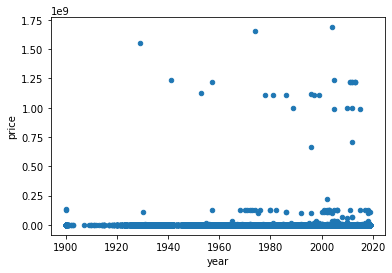

In [70]:
cars_prices.plot.scatter(x='year',y='price')

# Title status

In [145]:
cars_prices['title_status'].value_counts()


clean         436606
rebuilt        13310
salvage         8923
lien            5950
missing         3046
parts only      1449
Name: title_status, dtype: int64

In [146]:
def process_tilte_status(cars_prices)
    cars_prices['title_status'].replace({'clean':'good','rebuilt':'regular','lien':'bad','missing':'bad','parts only':'bad'},inplace=True)
    from sklearn import preprocessing

    le = preprocessing.LabelEncoder()
    le.fit(cars_prices['title_status'].unique())
    cars_prices['title_status']=le.transform(cars_prices['title_status'])
    return cars_prices

# Prices

In [111]:
q_25=cars_prices.price.quantile(0.25)
q_75=cars_prices.price.quantile(0.75)
cars_prices=cars_prices[(cars_prices.price>=q_25) & (cars_prices.price<=q_75) ]
cars_prices.shape

(119156, 24)

In [112]:
cars_prices.corr()

,Id,year,odometer,lat,long,county_fips,state_fips,weather,price
Id,1.000000,0.032501,-0.008170,-0.057727,0.168210,0.228917,0.228515,-0.036001,-0.015986
year,0.032501,1.000000,-0.049304,-0.018707,0.033282,0.013543,0.013398,0.019815,0.095905
odometer,-0.008170,-0.049304,1.000000,0.023445,-0.017058,-0.005265,-0.005254,-0.019729,-0.065313
lat,-0.057727,-0.018707,0.023445,1.000000,-0.179223,0.206076,0.207525,-0.859842,0.025904
long,0.168210,0.033282,-0.017058,-0.179223,1.000000,0.269331,0.269205,-0.011410,-0.033999
county_fips,0.228917,0.013543,-0.005265,0.206076,0.269331,1.000000,0.999980,-0.164663,-0.007962
state_fips,0.228515,0.013398,-0.005254,0.207525,0.269205,0.999980,1.000000,-0.165953,-0.007978
weather,-0.036001,0.019815,-0.019729,-0.859842,-0.011410,-0.164663,-0.165953,1.000000,-0.017608
price,-0.015986,0.095905,-0.065313,0.025904,-0.033999,-0.007962,-0.007978,-0.017608,1.000000


In [113]:
for column in cars_prices.columns:
    if cars_prices[column].dtype=='object':
        print(column,cars_prices[column].value_counts())

city yubasutter       903
sanantonio       693
austin           669
dallas           667
houston          662
tucson           656
vermont          654
boston           649
miami            636
sacramento       635
palmsprings      635
raleigh          634
knoxville        630
nashville        621
columbus         620
lasvegas         619
newjersey        617
atlanta          616
omaha            615
orangecounty     612
orlando          612
fortmyers        611
providence       606
norfolk          606
pittsburgh       602
tampa            601
modesto          600
newyork          600
inlandempire     592
maine            592
                ... 
monterrey          9
susanville         8
ftmcmurray         8
skeena             8
natchez            8
hermosillo         8
saskatoon          8
juneau             8
reddeer            7
regina             7
newbrunswick       6
niagara            6
guelph             6
thunderbay         6
kitchener          5
soo                5
cornwall

In [114]:
cars_prices_clean=cars_prices.drop('city',axis=1)

# Manufacturer

In [115]:
cars_country=pd.read_csv("..\data\cars_manufacturers.csv")

def add_manufacturer_country(cars_country):
    
    cars_prices=pd.merge(cars_prices, cars_country, on='manufacturer', how='left')
    return cars_prices



In [117]:
pd.get_dummies(cars_prices, prefix=['country'], columns=['country'])

,Id,city,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,state_name,weather,price,country_germany,country_italy,country_japan,country_south korea,country_sweden,country_united kingdom,country_united states
0,203486,rochester,2001.0,chevrolet,silverado 1500,NaN,NaN,gas,96000.0,clean,...,New York,53.0,5500,0,0,0,0,0,0,1
1,59980,northplatte,1975.0,ford,f-250,good,8 cylinders,gas,80000.0,clean,...,Colorado,45.0,5500,0,0,0,0,0,0,1
2,473356,akroncanton,2008.0,volvo,s80,excellent,6 cylinders,gas,143251.0,clean,...,Ohio,49.0,5372,0,0,0,0,1,0,0
3,941967,newyork,2007.0,honda,pilot ex,excellent,6 cylinders,gas,169000.0,clean,...,Connecticut,51.0,5399,0,0,1,0,0,0,0
4,1451731,jerseyshore,2006.0,chevrolet,silverado 1500,excellent,8 cylinders,gas,206629.0,clean,...,New Jersey,52.0,5995,0,0,0,0,0,0,1
5,228988,lafayette,2009.0,NaN,porsche cayenne turbo,NaN,8 cylinders,gas,NaN,clean,...,Louisiana,67.0,8500,0,0,0,0,0,0,0
6,632379,sfbay,1990.0,jeep,wrangler,good,4 cylinders,gas,182000.0,clean,...,California,59.0,7500,0,0,0,0,0,0,1
7,1612351,watertown,2008.0,pontiac,g6,excellent,4 cylinders,gas,86272.0,clean,...,New York,53.0,5788,0,0,0,0,0,0,1
8,1200759,missoula,2000.0,chevrolet,c/k 2500,NaN,8 cylinders,gas,225124.0,clean,...,Montana,40.0,7990,0,0,0,0,0,0,1
9,1054939,joplin,2013.0,hyundai,elantra coupe,good,4 cylinders,gas,NaN,clean,...,Missouri,52.0,5495,0,0,0,1,0,0,0


In [118]:
cars_prices.groupby(by='country').mean()

,Id,year,odometer,lat,long,county_fips,state_fips,weather,price
country,,,,,,,,,
germany,872826.353940,2006.207323,109649.308556,38.233119,-93.502865,27379.503227,27.292949,54.747205,7360.432620
italy,829140.325175,2010.954545,56131.288991,37.454876,-97.457119,27071.858268,26.976378,56.452756,7708.821678
japan,870816.108977,2007.618889,125893.850122,38.290240,-93.149306,27582.645340,27.496550,54.621682,7251.916485
south korea,892414.694944,2011.512578,95879.617686,38.351029,-92.648448,29218.130797,29.124493,54.635750,7525.468937
sweden,882335.335968,2006.626649,149078.283154,39.066094,-89.664951,29578.547170,29.495957,53.452830,6942.118577
united kingdom,867436.641760,2005.595789,101275.152318,37.904255,-94.997334,27354.951694,27.263879,54.726748,7238.002095
united states,876065.009979,2003.297380,130748.895055,38.776987,-92.365122,28846.535705,28.756020,53.341980,7308.781249


# ODOMETER

In [10]:
df_odo=cars_prices.dropna()
X=df_odo[['year']]
y=df_odo['odometer']
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test=train_test_split(X,y,test_size=0.33,random_state=1)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression().fit(X_train, Y_train)

In [13]:
y_real=reg.predict(X_test)

In [14]:
y_real=y_real.reshape(-1,1)

In [15]:
reg.score(X_test,Y_test)

0.012407813787893573

In [16]:
test_X = np.array(2006).reshape(-1, 1)
reg.predict(test_X)


array([125284.05704633])

In [17]:
odometer=[]
for row in cars_prices[['odometer','year']].values:
    test_X = np.array(row[1]).reshape(-1, 1)
    
    if np.isnan(row[0]) and np.isnan(row[1])==False :
        predict=reg.predict(test_X)[0]
    else:
        predict=row[0].astype(np.float)
    odometer.append(predict)
cars_prices['odometer_2']=odometer

In [28]:
X=cars_prices[['year']].fillna(method='ffill')
predict=reg.predict(X)
len(predict)

469992

In [23]:
cars_prices[['odometer','year']]

,odometer,year
0,190000.0,2006.0
1,NaN,2018.0
2,NaN,1997.0
3,NaN,2003.0
4,NaN,2000.0
5,308000.0,2005.0
6,38.0,2018.0
7,NaN,1999.0
8,208270.0,2006.0
9,96000.0,2001.0


In [127]:
cars_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119156 entries, 0 to 119155
Data columns (total 26 columns):
Id              119156 non-null int64
city            119156 non-null object
year            118807 non-null float64
manufacturer    111432 non-null object
make            114965 non-null object
condition       75654 non-null object
cylinders       76787 non-null object
fuel            118645 non-null object
odometer        83732 non-null float64
title_status    118935 non-null object
transmission    118563 non-null object
drive           75616 non-null object
size            44591 non-null object
type            72617 non-null object
paint_color     72906 non-null object
lat             119156 non-null float64
long            119156 non-null float64
county_fips     115978 non-null float64
county_name     115978 non-null object
state_fips      115978 non-null float64
state_code      115978 non-null object
state_name      119156 non-null object
weather         115958 non-null f

# Condition

In [3]:
from sklearn import preprocessing
df_odo=cars_prices.dropna()

le = preprocessing.LabelEncoder()
le.fit(df_odo.condition.unique())
df_odo.condition=le.transform(df_odo.condition) 

c:\program files (x86)\python37-32\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [5]:


X=df_odo[['year','odometer']]
y=df_odo['condition']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test=train_test_split(X,y,test_size=0.33,random_state=1)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)



In [6]:
y_real=reg.predict(X_test)
y_real=y_real.reshape(-1,1)
reg.score(X_test,Y_test)

0.0047875488751432105

In [7]:
from sklearn import preprocessing
cars_prices.condition.fillna('desconocido',inplace=True)
le = preprocessing.LabelEncoder()
le.fit(cars_prices.condition.unique())
cars_prices.condition=le.transform(cars_prices.condition) 

In [133]:

condition=[]
for row in cars_prices[['condition','year','odometer_2']].values:
    test_X = np.array(row[1:]).reshape(-1,1)
    try:
        predict=reg.predict(test_X)[0]
    except:
        predict=row[0]
    condition.append(predict)


In [134]:

cars_prices['condition']=condition

In [135]:
cars_prices[['manufacturer','type','condition','year','odometer_2','odometer','price']]

,manufacturer,type,condition,year,odometer_2,odometer,price
0,chevrolet,NaN,0.0,2001.0,96000.000000,96000.0,5500
1,ford,truck,3.0,1975.0,80000.000000,80000.0,5500
2,volvo,sedan,1.0,2008.0,143251.000000,143251.0,5372
3,honda,SUV,1.0,2007.0,169000.000000,169000.0,5399
4,chevrolet,pickup,1.0,2006.0,206629.000000,206629.0,5995
5,NaN,NaN,0.0,2009.0,126462.827404,NaN,8500
6,jeep,offroad,3.0,1990.0,182000.000000,182000.0,7500
7,pontiac,sedan,1.0,2008.0,86272.000000,86272.0,5788
8,chevrolet,truck,0.0,2000.0,225124.000000,225124.0,7990
9,hyundai,NaN,3.0,2013.0,124324.270342,NaN,5495


In [138]:
cars_prices.head()

,Id,city,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,long,county_fips,county_name,state_fips,state_code,state_name,weather,price,country,odometer_2
0,203486,rochester,2001.0,chevrolet,silverado 1500,0,NaN,gas,96000.0,clean,...,-77.600700,36055.0,Monroe,36.0,NY,New York,53.0,5500,united states,96000.0
1,59980,northplatte,1975.0,ford,f-250,3,8 cylinders,gas,80000.0,clean,...,-105.090100,8059.0,Jefferson,8.0,CO,Colorado,45.0,5500,united states,80000.0
2,473356,akroncanton,2008.0,volvo,s80,1,6 cylinders,gas,143251.0,clean,...,-81.481860,39153.0,Summit,39.0,OH,Ohio,49.0,5372,sweden,143251.0
3,941967,newyork,2007.0,honda,pilot ex,1,6 cylinders,gas,169000.0,clean,...,-73.130400,9001.0,Fairfield,9.0,CT,Connecticut,51.0,5399,japan,169000.0
4,1451731,jerseyshore,2006.0,chevrolet,silverado 1500,1,8 cylinders,gas,206629.0,clean,...,-74.141727,34029.0,Ocean,34.0,NJ,New Jersey,52.0,5995,united states,206629.0


In [211]:
df2=pd.get_dummies(cars_prices, prefix=['condition'], columns=['condition'])

In [ ]:
df2.corr()

# Test prices submision

In [3]:
cars_prices_test=pd.read_csv("..\data\cars_test.csv")

In [15]:
cars_prices_test[cars_prices_test.condition.isna()]['year'].value_counts()

2015.0    6598
2007.0    6230
2008.0    5854
2006.0    5570
2012.0    5168
2013.0    5108
2014.0    5087
2011.0    5017
2005.0    4885
2016.0    4827
2004.0    4457
2010.0    4429
2017.0    4389
2003.0    3710
2009.0    3700
2002.0    3131
2001.0    2542
2000.0    2276
2018.0    2039
1999.0    1912
1998.0    1397
1997.0    1228
1995.0     930
1996.0     921
1994.0     659
1993.0     561
1992.0     440
1991.0     432
1989.0     403
1990.0     385
          ... 
1936.0      36
1934.0      32
1932.0      29
1927.0      28
1939.0      26
1946.0      25
1900.0      19
1923.0      17
1938.0      17
1928.0      16
1933.0      16
1926.0      14
1935.0      13
1942.0      11
1925.0       7
1924.0       6
1901.0       5
1921.0       5
1922.0       4
1918.0       3
1945.0       3
1943.0       2
1917.0       2
1916.0       2
1944.0       2
1740.0       1
1920.0       1
1915.0       1
1553.0       1
302.0        1
Name: year, Length: 109, dtype: int64